# Tablet Boxenplot

Create a boxenplot suitable for showing the effect of varying dosages where the dosages are integers
between 1 and 10 inclusive.
Example: Compare the effect of trying one, two, or three tablets per day.

Copyright ©2021-2022. Stephen Rigden. This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this program. If not, see http://www.gnu.org/licenses/.

In [1]:
import pandas
from pathlib import Path

import seaborn
from matplotlib import pyplot


seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [2]:
# Set file paths
project_path = Path.cwd().parent.parent
heart_and_externals_pickle = project_path / 'data' / 'processed' / 'heart_and_externals.pickle'
tablets_pdf = project_path / 'reports' / 'tablets.pdf'
tablets_jpg = project_path / 'reports' / 'tablets.jpg'

### Load and view the data

In [3]:
heds = pandas.read_pickle(heart_and_externals_pickle)
heds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            112 non-null    datetime64[ns]
 1   systolic        112 non-null    float64       
 2   diastolic       112 non-null    float64       
 3   pulse pressure  112 non-null    float64       
 4   heart_tablets   112 non-null    Int64         
 5   alcohol         112 non-null    Int64         
dtypes: Int64(2), datetime64[ns](1), float64(3)
memory usage: 6.3 KB


In [4]:
heds.head()

,date,systolic,diastolic,pulse pressure,heart_tablets,alcohol
0,2021-12-01 22:30:00,131.0,86.0,45.0,2,0
1,2021-12-01 23:38:00,144.0,79.0,65.0,2,0
2,2021-12-02 00:22:00,140.0,80.0,60.0,2,177
3,2021-12-02 01:16:00,135.0,78.0,57.0,2,177
4,2021-12-02 22:19:00,131.0,70.0,61.0,2,177


In [5]:
heds.tail()

,date,systolic,diastolic,pulse pressure,heart_tablets,alcohol
107,2021-12-31 01:19:00,137.0,78.0,59.0,2,30
108,2021-12-31 21:59:00,114.0,70.0,44.0,2,30
109,2021-12-31 23:13:00,134.0,81.0,53.0,2,30
110,2022-01-01 00:11:00,135.0,79.0,56.0,2,106
111,2022-01-01 01:25:00,137.0,81.0,56.0,2,106


[Text(0.5, 0, 'Tablets taken'), Text(0, 0.5, 'observation count')]

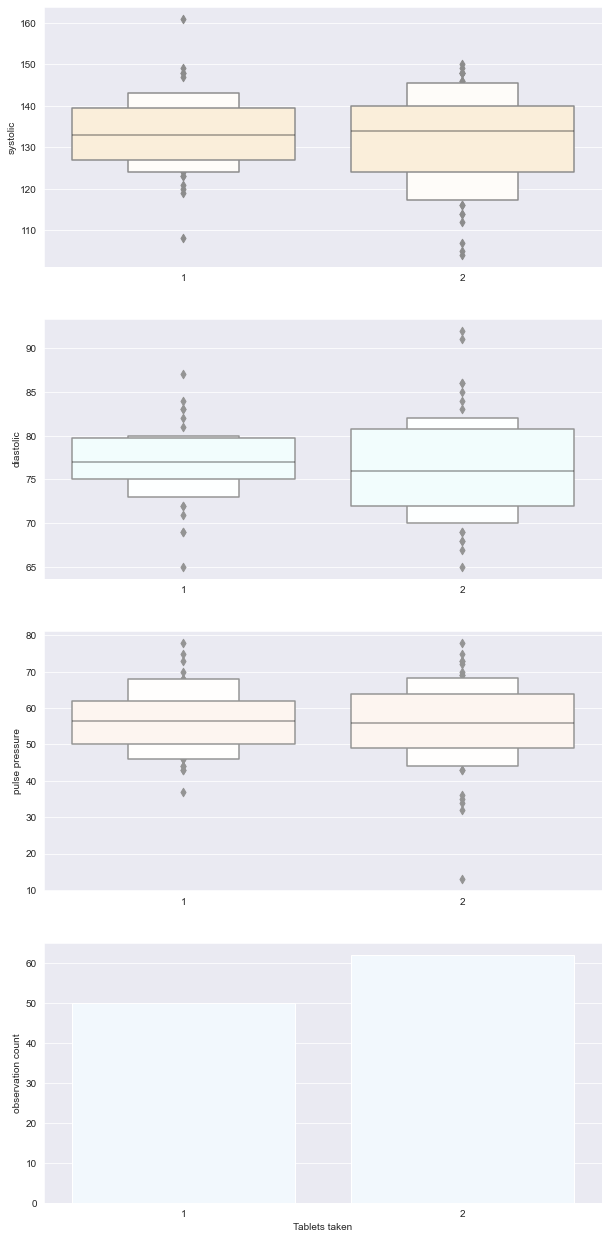

In [6]:
fig, axes = pyplot.subplots(nrows=4, ncols=1, figsize=(10, 22))

# Plot systolic
seaborn.boxenplot(data=heds,
                  x='heart_tablets', y='systolic',
                  ax=axes[0], palette=['papayawhip'])

# Plot diastolic
seaborn.boxenplot(data=heds,
                  x='heart_tablets', y='diastolic',
                  ax=axes[1], palette=['azure'])

# Plot pulse pressure
seaborn.boxenplot(data=heds,
                  x='heart_tablets', y='pulse pressure',
                  ax=axes[2], palette=['seashell'])

# Plot observation counts
seaborn.countplot(data=heds,
                  x='heart_tablets',
                  ax=axes[3], palette=['aliceblue'])

axes[0].set(xlabel=None)
axes[1].set(xlabel=None)
axes[2].set(xlabel=None)
axes[3].set(xlabel=f"Tablets taken", ylabel='observation count')

In [7]:
# Save the plots
fig.savefig(tablets_jpg)
fig.savefig(tablets_pdf)